In [5]:
import illustris_python as il
import mistree as mist
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import astropy.units as u
import astropy.constants as c
import pandas as pd
import networkx as nx
import seaborn as sns
import scienceplots

from sklearn.neighbors import radius_neighbors_graph
from scipy.spatial import Delaunay
from scipy.spatial.distance import euclidean, minkowski

plt.style.use(['science','no-latex'])


In [6]:
import Utilities as ut

In [7]:
testcat = ut.cat(path=r'/Users/daksheshkololgi/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Year 1/Illustris/TNG300-1', snapno=99, masscut=1e10)

Mean Subhalo Separation: 2.26 Mpc
Number Density of Subhalos: 0.0036 Mpc^-3


In [8]:
testcat.cweb_classify(xyzplot=False)

In [7]:
len(testcat.Sc_subhalos)

97233

In [8]:
np.count_nonzero(testcat.Sc_subhalos)

94145

In [40]:
len(np.where(testcat.Sw_subhalos != 0.)[0])

97233

In [29]:
indices_Sc=np.argwhere(testcat.Sc_subhalos != 0.)
indices_Sf=np.argwhere(testcat.Sf_subhalos != 0.)
indices_Sw=np.argwhere(testcat.Sw_subhalos != 0.)

hist_Sc=np.log10(testcat.Sc_subhalos[indices_Sc])
hist_Sf=np.log10(testcat.Sf_subhalos[indices_Sf])
hist_Sw=np.log10(testcat.Sw_subhalos[indices_Sw])

print(min(hist_Sc), max(hist_Sc))
print(min(hist_Sf), max(hist_Sf))
print(min(hist_Sw), max(hist_Sw))

[-8.41327161] [2.80601968]
[-4.21808216] [2.81878235]
[-1.31791345] [2.61975108]


(-9.0, 3.0)

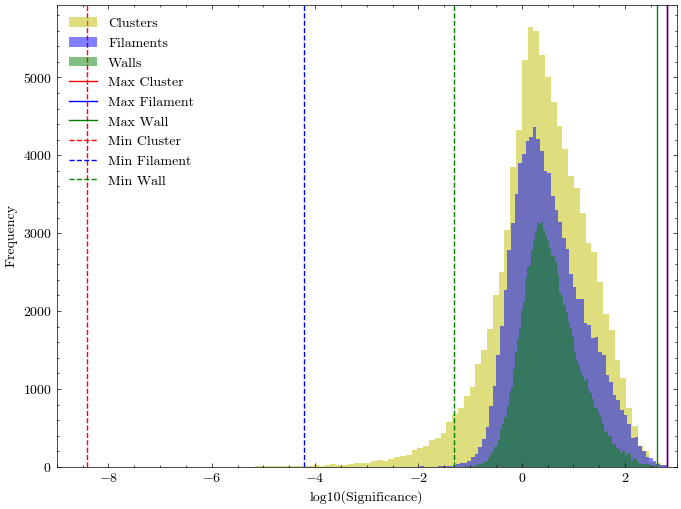

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(hist_Sc, bins=100, label='Clusters', alpha=0.5, color='y')
ax.hist(hist_Sf, bins=100, label='Filaments', alpha=0.5, color='blue')
ax.hist(hist_Sw, bins=100, label='Walls', alpha=0.5, color='green')
ax.axvline(max(hist_Sc), color='r', label='Max Cluster')
ax.axvline(max(hist_Sf), color='b', label='Max Filament')
ax.axvline(max(hist_Sw), color='g', label='Max Wall')
ax.axvline(min(hist_Sc), color='r', linestyle='--', label='Min Cluster')
ax.axvline(min(hist_Sf), color='b', linestyle='--', label='Min Filament')
ax.axvline(min(hist_Sw), color='g', linestyle='--', label='Min Wall')
ax.legend()
ax.set_xlabel('log10(Significance)')
ax.set_ylabel('Frequency')
ax.set_xlim(-9, 3)

In [36]:
from sklearn.preprocessing import minmax_scale

hist_Sc=minmax_scale(hist_Sc)
hist_Sf=minmax_scale(hist_Sf)
hist_Sw=minmax_scale(hist_Sw)

Text(0, 0.5, 'Frequency')

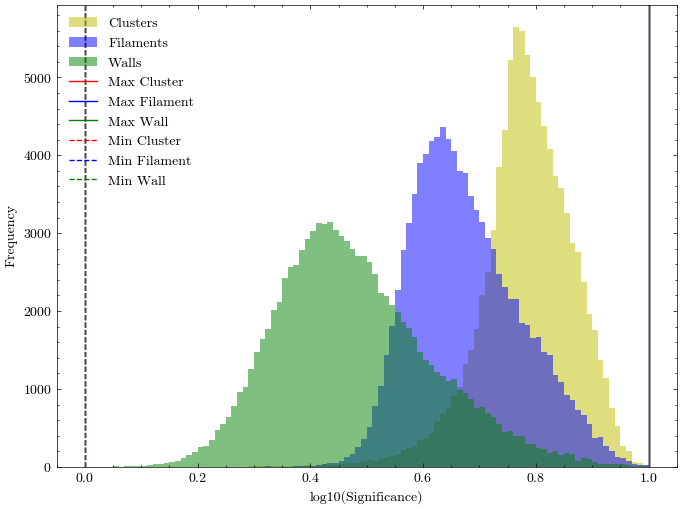

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(hist_Sc, bins=100, label='Clusters', alpha=0.5, color='y')
ax.hist(hist_Sf, bins=100, label='Filaments', alpha=0.5, color='blue')
ax.hist(hist_Sw, bins=100, label='Walls', alpha=0.5, color='green')
ax.axvline(max(hist_Sc), color='r', label='Max Cluster')
ax.axvline(max(hist_Sf), color='b', label='Max Filament')
ax.axvline(max(hist_Sw), color='g', label='Max Wall')
ax.axvline(min(hist_Sc), color='r', linestyle='--', label='Min Cluster')
ax.axvline(min(hist_Sf), color='b', linestyle='--', label='Min Filament')
ax.axvline(min(hist_Sw), color='g', linestyle='--', label='Min Wall')
ax.legend()
ax.set_xlabel('log10(Significance)')
ax.set_ylabel('Frequency')
